# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities

['puerto ayora',
 'bredasdorp',
 'te anau',
 'alugan',
 'qaanaaq',
 'lagoa',
 'thompson',
 'mataura',
 'jamestown',
 'albany',
 'souillac',
 'hermanus',
 'severo-kurilsk',
 'arraial do cabo',
 'rikitea',
 'castro',
 'santa maria',
 'punta arenas',
 'vaini',
 'skjervoy',
 'nouakchott',
 'dikson',
 'atuona',
 'tsihombe',
 'geraldton',
 'barrow',
 'saint-philippe',
 'marcona',
 'ituni',
 'palabuhanratu',
 'dunedin',
 'faanui',
 'bluff',
 'amderma',
 'upernavik',
 'luderitz',
 'beloha',
 'karamea',
 'busselton',
 'cape town',
 'georgetown',
 'hobart',
 'itarema',
 'saint george',
 'sambava',
 'udankudi',
 'nikolskoye',
 'codrington',
 'mitu',
 'nelson bay',
 'florianopolis',
 'airai',
 'moyale',
 'ushuaia',
 'makat',
 'san patricio',
 'svetlyy',
 'kapaa',
 'belushya guba',
 'leningradskiy',
 'richards bay',
 'chuy',
 'san isidro',
 'katsuura',
 'lata',
 'nizhneyansk',
 'havoysund',
 'half moon bay',
 'barentsburg',
 'new norfolk',
 'avera',
 'thunder bay',
 'bafq',
 'aporawan',
 'bethel',


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
weather_check = []
record_number = 0
city_id = []
city_name = []

weather_api_key = "ea45174aae3e4fc5de1af5d14f74cd81"
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
print("Beginning Data Retrieval")
print("------------------------------")
for city in cities:
    city_url = url + "ea45174aae3e4fc5de1af5d14f74cd81&q=" + city
    response_raw = requests.get(city_url)
#     if response_raw.status_code == 200:
    try:
        response = response_raw.json()
        record_number = record_number + 1
        weather_check.append(response['weather'][0]['main'])
        city_id.append(response['id'])
        city_name.append(response['name'])
        weather_dict = {
            "City": city_name,
            "City ID": city_id,
            "Weather": weather_check
        }
        print(f"Processing record {record_number} | {city}")
    except: 
        print("City not found. skipping...")
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
------------------------------
Processing record 1 | puerto ayora
Processing record 2 | bredasdorp
Processing record 3 | te anau
Processing record 4 | alugan
Processing record 5 | qaanaaq
Processing record 6 | lagoa
Processing record 7 | thompson
Processing record 8 | mataura
Processing record 9 | jamestown
Processing record 10 | albany
Processing record 11 | souillac
Processing record 12 | hermanus
Processing record 13 | severo-kurilsk
Processing record 14 | arraial do cabo
Processing record 15 | rikitea
Processing record 16 | castro
Processing record 17 | santa maria
Processing record 18 | punta arenas
Processing record 19 | vaini
Processing record 20 | skjervoy
Processing record 21 | nouakchott
Processing record 22 | dikson
Processing record 23 | atuona
City not found. skipping...
Processing record 25 | geraldton
Processing record 26 | barrow
Processing record 27 | saint-philippe
City not found. skipping...
City not found. skipping...
City not found. skippin

Processing record 253 | storforshei
Processing record 254 | cidreira
Processing record 255 | panama city
Processing record 256 | kapuskasing
Processing record 257 | tarko-sale
Processing record 258 | isangel
Processing record 259 | muramatsu
Processing record 260 | shar
Processing record 261 | komsomolskiy
Processing record 262 | cotoca
Processing record 263 | port elizabeth
Processing record 264 | porto seguro
Processing record 265 | sibolga
Processing record 266 | divo
Processing record 267 | hamilton
Processing record 268 | nanortalik
City not found. skipping...
City not found. skipping...
Processing record 271 | guerrero negro
Processing record 272 | kitob
Processing record 273 | pevek
Processing record 274 | pisco
Processing record 275 | jaisalmer
Processing record 276 | nosy varika
Processing record 277 | port macquarie
Processing record 278 | esik
Processing record 279 | chokurdakh
Processing record 280 | jiutai
Processing record 281 | kondinskoye
City not found. skipping...
Pro

Processing record 505 | summerside
Processing record 506 | chumikan
Processing record 507 | tra vinh
Processing record 508 | bambanglipuro
Processing record 509 | galesong
Processing record 510 | maceio
Processing record 511 | nkawkaw
Processing record 512 | katherine
Processing record 513 | burgersdorp
Processing record 514 | port hardy
Processing record 515 | maymyo
Processing record 516 | susehri
City not found. skipping...
Processing record 518 | barabinsk
Processing record 519 | salaga
Processing record 520 | axim
Processing record 521 | hamada
City not found. skipping...
Processing record 523 | gat
Processing record 524 | sirur
Processing record 525 | phalaborwa
Processing record 526 | pahrump
Processing record 527 | hirara
Processing record 528 | la sarre
Processing record 529 | vao
Processing record 530 | cap malheureux
Processing record 531 | stornoway
Processing record 532 | anchorage
Processing record 533 | pandan
Processing record 534 | pangnirtung
Processing record 535 | b

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_id = 1
city_id_list=[]
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

for city in cities:
    city_url = url + "ea45174aae3e4fc5de1af5d14f74cd81&q=" + city
    response_raw = requests.get(city_url)
    if response_raw.status_code == 200:
        city_id_list.append(city_id)
        response = response_raw.json()
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt']) 
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        city_id = city_id + 1

cities_dict = {
    "City ID": city_id_list,
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}
cities_data = pd.DataFrame(cities_dict)
cities_data



,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,1,Puerto Ayora,74,EC,1596176957,93,-0.74,-90.35,66.99,1.01
1,2,Bredasdorp,0,ZA,1596176957,93,-34.53,20.04,42.80,4.54
2,3,Te Anau,99,NZ,1596176957,90,-45.42,167.72,48.47,0.11
3,4,Alugan,100,PH,1596176958,88,12.22,125.48,79.34,11.34
4,5,Qaanaaq,0,GL,1596176958,85,77.48,-69.36,34.57,3.74
...,...,...,...,...,...,...,...,...,...,...
567,568,Chegdomyn,61,RU,1596176784,62,51.12,133.02,80.60,9.37
568,569,Tak Bai,20,TH,1596176785,66,6.26,102.05,89.60,5.82
569,570,Vila Velha,90,BR,1596176785,88,-20.33,-40.29,73.99,9.17
570,571,Northam,0,GB,1596176785,66,51.03,-4.22,69.01,8.99


In [9]:
cities_data.to_csv("../output_data/cities_data.csv", encoding="utf-8", index=False)
cities_data.head()

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,1,Puerto Ayora,74,EC,1596176957,93,-0.74,-90.35,66.99,1.01
1,2,Bredasdorp,0,ZA,1596176957,93,-34.53,20.04,42.80,4.54
2,3,Te Anau,99,NZ,1596176957,90,-45.42,167.72,48.47,0.11
3,4,Alugan,100,PH,1596176958,88,12.22,125.48,79.34,11.34
4,5,Qaanaaq,0,GL,1596176958,85,77.48,-69.36,34.57,3.74


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
# no cities with temperature above 100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

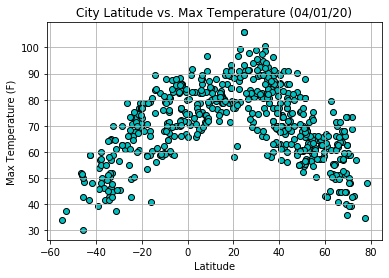

In [13]:
plt.scatter(lat, max_temp, marker="o", facecolors="c", edgecolors="black")
plt.grid()
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")



## Latitude vs. Humidity Plot

Text(0, 0.5, 'Latitude')

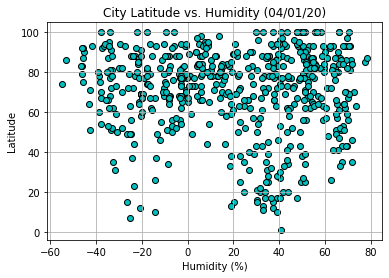

In [14]:
plt.scatter(lat, humidity, marker="o", facecolors="c", edgecolors="black")
plt.grid()
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Latitude')

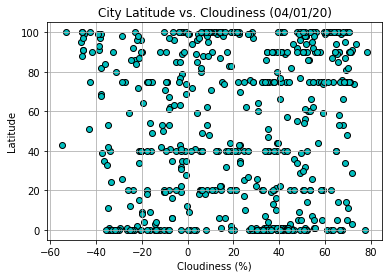

In [15]:
plt.scatter(lat, cloudiness, marker="o", facecolors="c", edgecolors="black")
plt.grid()
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Latitude')

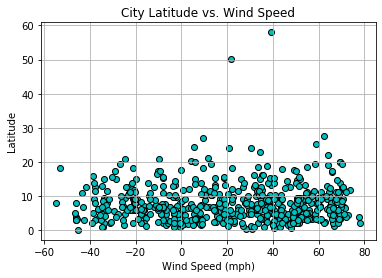

In [16]:
plt.scatter(lat, wind_speed, marker="o", facecolors="c", edgecolors="black")
plt.grid()
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


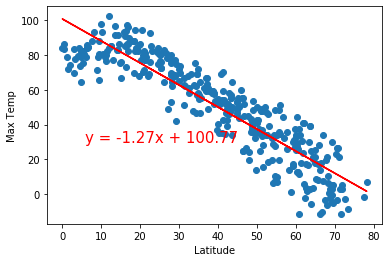

In [16]:
"Max Temp"
"Latitude"

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


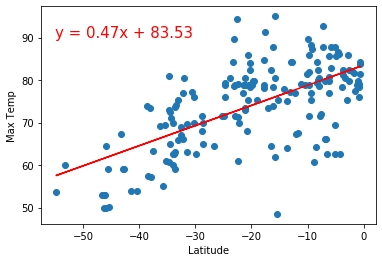

In [17]:
"Max Temp"
"Latitude"

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


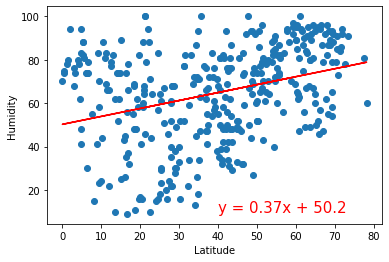

In [18]:
"Humidity"
"Latitude"

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


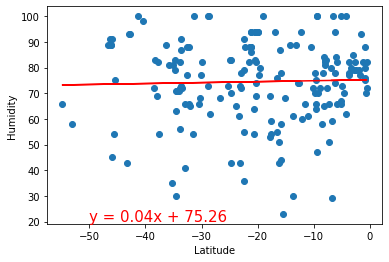

In [19]:
"Humidity"
"Latitude"

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


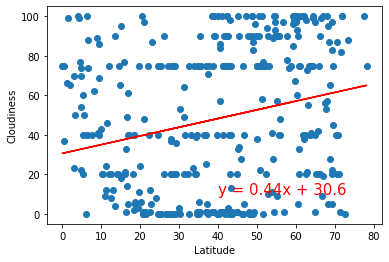

In [20]:
"Cloudiness"
"Latitude"

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


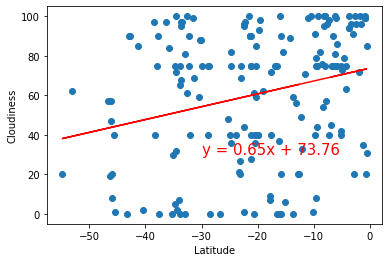

In [21]:
"Cloudiness"
"Latitude"

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


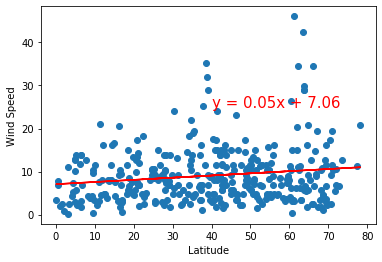

In [22]:
"Wind Speed"
"Latitude"

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


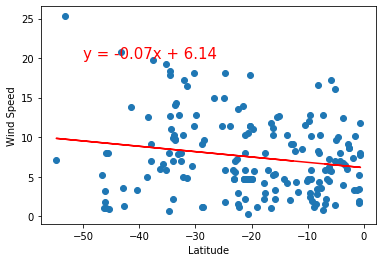

In [23]:
"Wind Speed"
"Latitude"